## Task: We have 5000+ movies data, we have to group them according to facebook likes

### Import the dataset and look at the shape of it.

In [10]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() #For plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv('movie_metadata1.csv')
print(data.shape)
print(data.head)

(5043, 28)
<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                     723       178   
1     Color     Gore Verbinski                     302       169   
2     Color         Sam Mendes                     602       148   
3     Color  Christopher Nolan                     813       164   
4        49        Doug Walker                      49        49   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                       1        87   
5039  Color                 49                      43        43   
5040  Color   Benjamin Roberds                      13        76   
5041  Color        Daniel Hsia                      14       100   
5042  Color           Jon Gunn                      43        90   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                           0                     855  Joel David M

In [12]:
data['director_facebook_likes'] 

0           0
1         563
2           0
3       22000
4         131
        ...  
5038        2
5039       49
5040        0
5041        0
5042       16
Name: director_facebook_likes, Length: 5043, dtype: int64

In [13]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Slice out the two columns

In [14]:
newdata = data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


### We will use KMeans from sklearn ro see the clusters in our data

In [19]:
#Using the KMeans from sklearn
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=5)

In [23]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.cluster_centers_
#print(len(kmeans.cluster_centers_)) 

array([[  151.29382199,   420.67350785],
       [17621.21212121,   596.10606061],
       [  210.77011494, 11126.43678161],
       [12490.38461538,   605.93269231],
       [17545.45454545, 14545.45454545]])

In [25]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [30]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 66, 2: 87, 3: 104, 4: 11}


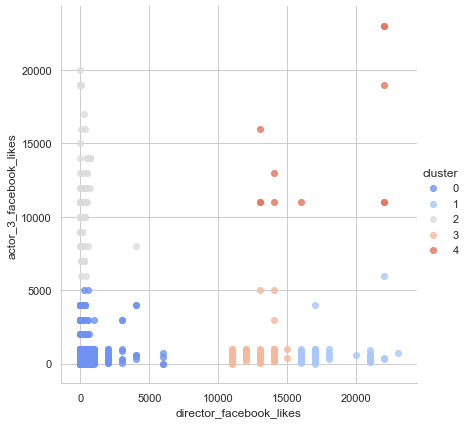

In [35]:
#plot the data
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes', 
           data=newdata, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

#### (It seems that cluster 0 and cluster 2 are very close to each other)